# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Importing data


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Codsoft/Movie genre classification/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data = pd.read_csv("/content/drive/MyDrive/Codsoft/Movie genre classification/test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-2-6f3e753e23b2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("/content/drive/MyDrive/Codsoft/Movie genre classification/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
<ipython-input-2-6f3e753e23b2>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("/content/drive/MyDrive/Codsoft/Movie genre classification/test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [ ]:
display(train_data.head())

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
display(test_data.head())

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [ ]:
train_data.isna().any()

ID             False
TITLE          False
GENRE          False
DESCRIPTION    False
dtype: bool

# Visualising the count 'genre'

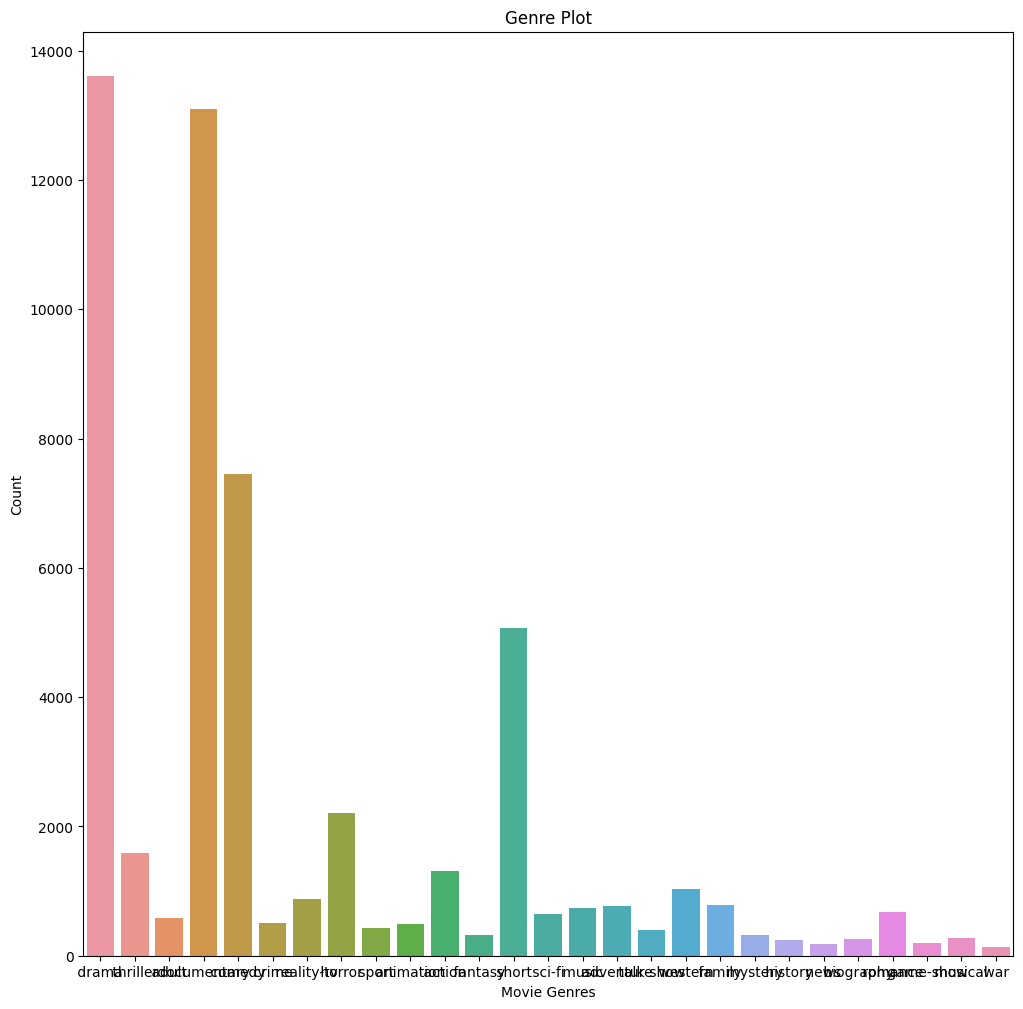

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='GENRE', data=train_data)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# Data preprocessing

In [ ]:
movie_genre = list(train_data['GENRE'].unique())
movie_genre.sort()
movie_genre

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
genre_mapper = {
' action ': 1,
' adventure ': 2,
' comedy ':3,
' drama ':4,
' horror ':5,
' romance ':6,
' sci-fi ':7,
' thriller ': 8,
' adult ':9,
' animation ':10,
' crime ':11,
' history ':12,
' biography ':13,
' documentary ':14,
' family ':15,
' fantasy ':16,
' game-show ':17,
' history ':18,
' music ':19,
' musical ':20,
' mystery ':21,
' news ':22,
' reality-tv ':23,
' romance ':24,
' sci-fi ':25,
' short ':26,
' sport ':27,
' talk-show ':28,
' war ':29,
' western ':30}
train_data['GENRE'] = train_data['GENRE'].map(genre_mapper)
train_data.head(10)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),4,Listening in to a conversation between his do...
1,2,Cupid (1997),8,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",9,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),4,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),4,The film's title refers not only to the un-re...
5,6,Quality Control (2011),14,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",3,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),11,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",23,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),5,Four high school students embark on a terrify...


In [ ]:
train_data.isna().any()

ID             False
TITLE          False
GENRE          False
DESCRIPTION    False
dtype: bool

In [ ]:
train_data.drop('ID' ,axis=1,inplace=True)
train_data.drop('TITLE',axis=1,inplace=True)

In [ ]:
train_data.head()

,GENRE,DESCRIPTION
0,4,Listening in to a conversation between his do...
1,8,A brother and sister with a past incestuous r...
2,9,As the bus empties the students for their fie...
3,4,To help their unemployed father make ends mee...
4,4,The film's title refers not only to the un-re...


In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0, train_data.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=train_data['DESCRIPTION'][i])
    dialog = dialog.lower()
    words = dialog.split()
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in dialog_words]
    dialog = ' '.join(words)
    corpus.append(dialog)

In [ ]:
corpus[0:2]

['listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue',
 'brother sister past incestu relationship current murder relationship murder women reject murder women get close']

In [ ]:
len(corpus)

54214

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = vectorizer.fit_transform(corpus).toarray()

In [ ]:
y=train_data['GENRE'].values

# Splitting and training model on dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (43371, 10000), X_test size: (10843, 10000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
test_data.drop('ID',axis=1,inplace=True)
test_data.drop('TITLE',axis=1,inplace=True)

In [ ]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = vectorizer.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

# Predictions

In [ ]:
from random import randint
row = randint(0,test_data.shape[0]-1)
sample_script = test_data.GENRE[row]

print('Description: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Description:  It is a story of Shekars fight against his own belief that there is a curse on him, that everytime he expresses his feelings he looses that person. This internal fight is motivated by the external political fights between the farmers of two southern indian states over the river waters.
Prediction:  family 
